In [1]:
import os
import PIL


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


In [4]:
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from tensorflow.keras.layers import *


In [7]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [8]:
os.listdir('./data')

['0', '1', '2', '3', '4']

In [9]:
os.listdir(os.path.join('data','0'))

['resized_resized_resized_resized_resized_10003_left_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10003_right_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10007_left_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10007_right_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10009_left_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10009_right_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_1000_left_gaussian_filtered_gaussian_filtered_gaussian_filter

In [10]:
os.listdir(os.path.join('data','1'))

['resized_resized_resized_resized_resized_10000_aug_0_4851_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10001_12227_left._original_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10002_aug_0_8303_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10003_aug_0_185_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10004_aug_0_6876_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10005_aug_0_5404_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10006_14251_left._o

In [11]:
os.listdir(os.path.join('data','2'))

['resized_resized_resized_resized_resized_10000_14152_right._original_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10001_aug_0_9629_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10002_aug_0_7567_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10003_aug_0_2555_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10004_41692_right._original_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10005_aug_0_4952_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10006_

In [12]:
os.listdir(os.path.join('data','3'))

['resized_resized_resized_resized_resized_10000_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10001_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10002_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10003_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10004_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10005_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10006_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtere

In [13]:
os.listdir(os.path.join('data','4'))

['resized_resized_resized_resized_resized_10000_aug_0_9112_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10001_aug_0_4072_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10002_aug_0_9108_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10003_aug_0_8020_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10004_aug_0_755_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10005_aug_0_8849_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered_gaussian_filtered.png',
 'resized_resized_resized_resized_resized_10006_aug_0_8533_gaussian_fil

In [14]:
data = []
label = []
label_counts = {}
for i in os.listdir('./data'):
    train_class = os.listdir(os.path.join('data', i))
    label_counts[i] = 0 
    for j in train_class:
        img = os.path.join('data', i, j)
        data.append(img)
        label.append(i)
        label_counts[i] += 1  
print("Total number of images =", len(data))
for i, count in label_counts.items():
    print(f"Label {i}: {count} images")

Total number of images = 128090
Label 0: 25802 images
Label 1: 25893 images
Label 2: 25875 images
Label 3: 25118 images
Label 4: 25402 images


In [15]:
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
print(label)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

C:\Users\chait\OneDrive\Desktop\pyt\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

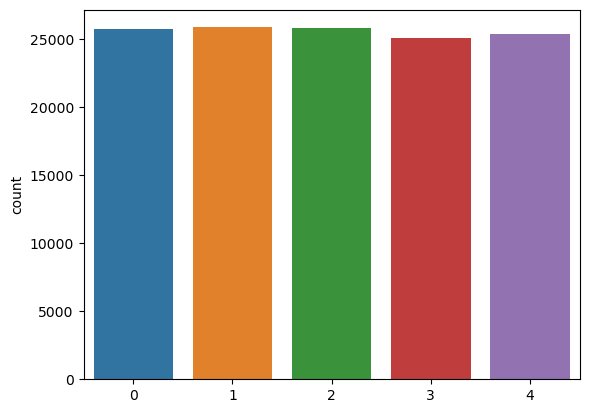

In [17]:
sns.countplot(label)

<bound method Figure.tight_layout of <Figure size 2000x2000 with 25 Axes>>

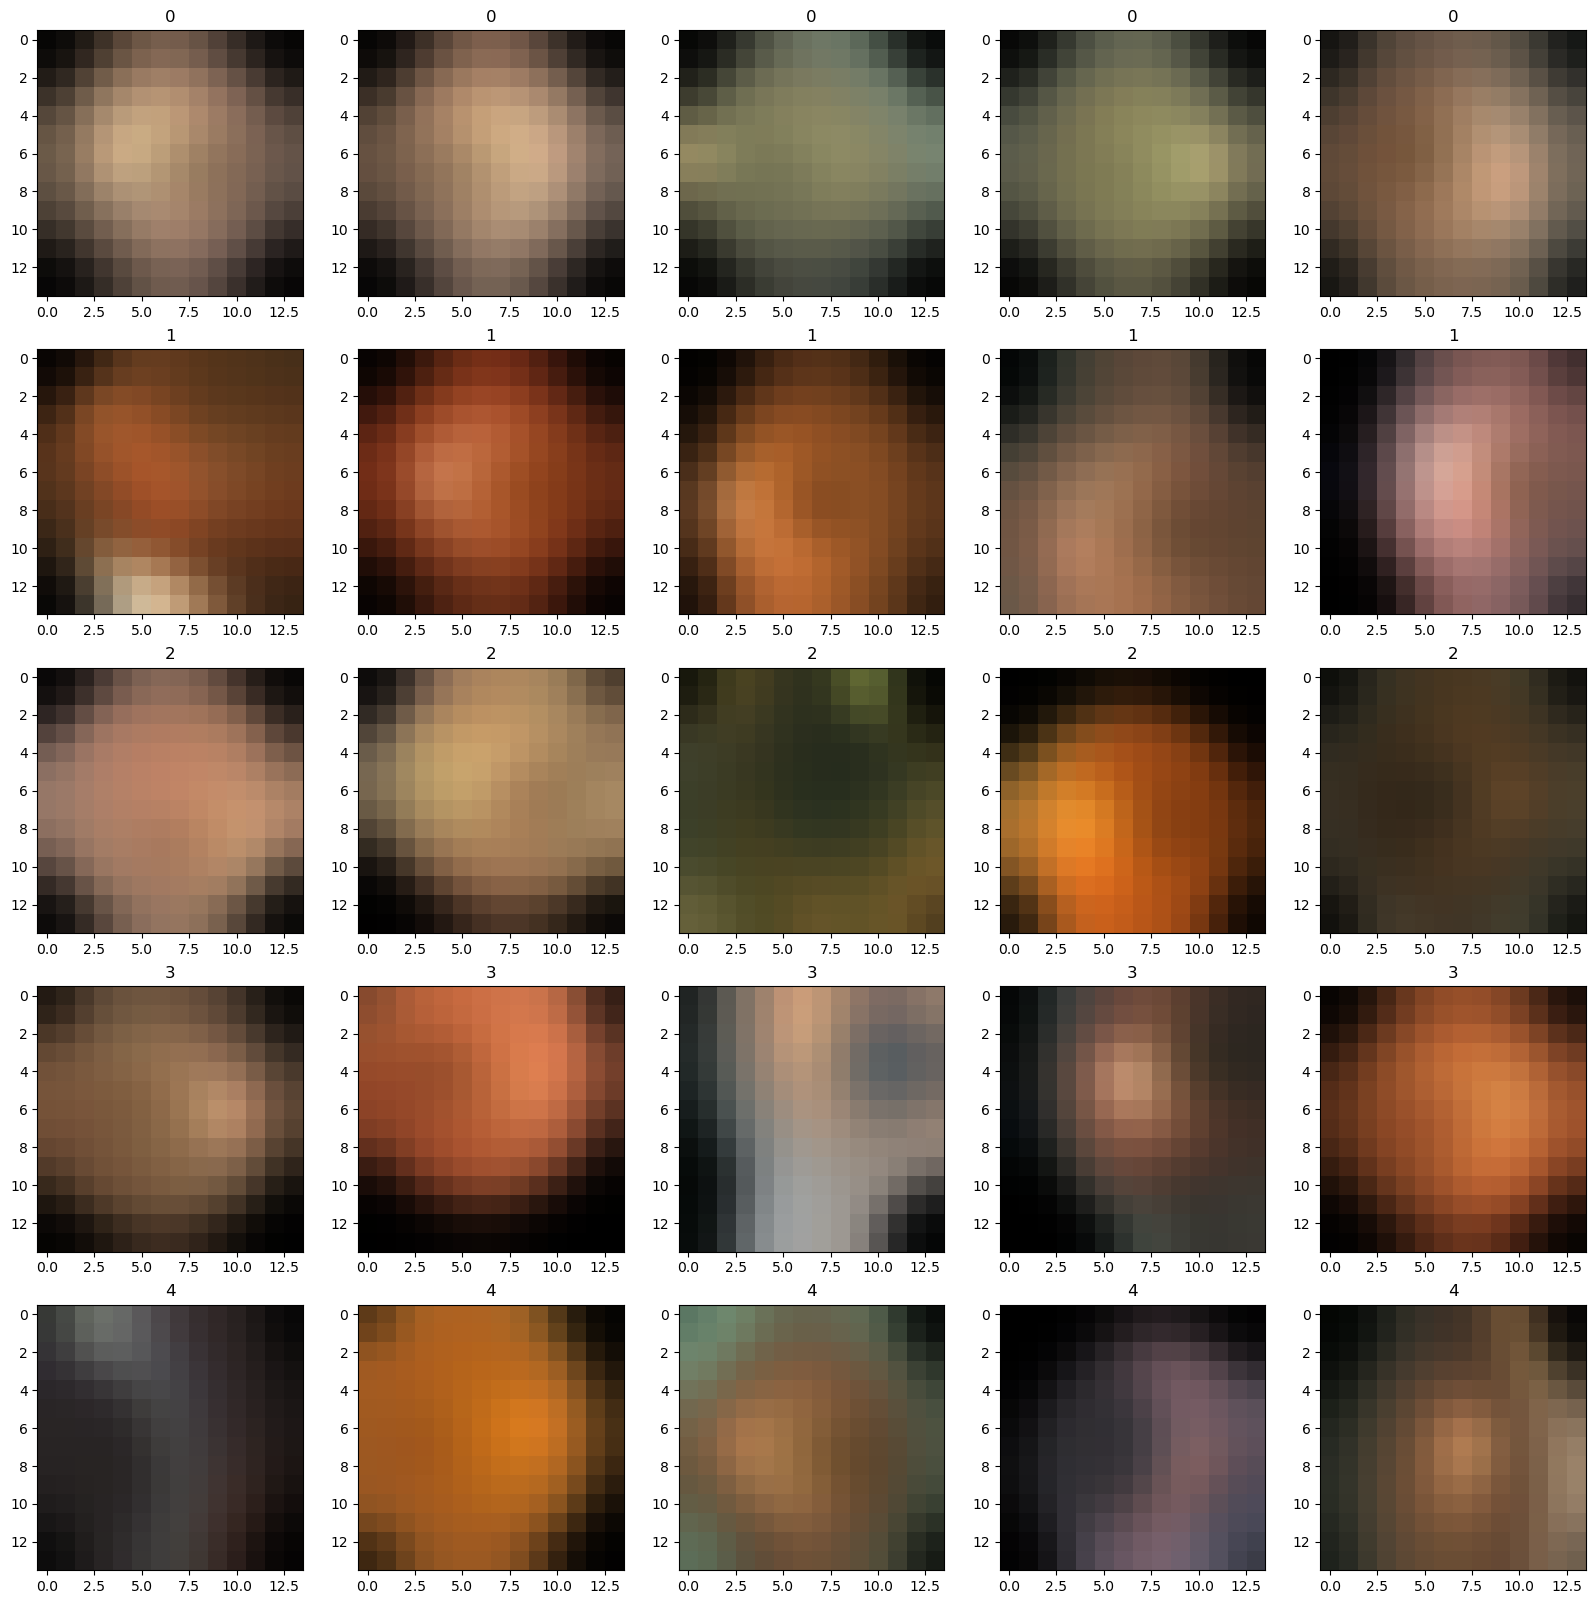

In [18]:
fig,axs=plt.subplots(5,5,figsize=(20,20))
count=0
for i in os.listdir('./data'):
    train_class=os.listdir(os.path.join('data',i))
    for j in range(5):
        img=os.path.join('data',i,train_class[j])
        img=PIL.Image.open(img)
        axs[count][j].title.set_text(i)
        axs[count][j].imshow(img)
    count+=1
fig.tight_layout

In [19]:
dr224_df=pd.DataFrame({'Image':data, 'Label':label})
dr224_df

,Image,Label
0,data\0\resized_resized_resized_resized_resized...,0
1,data\0\resized_resized_resized_resized_resized...,0
2,data\0\resized_resized_resized_resized_resized...,0
3,data\0\resized_resized_resized_resized_resized...,0
4,data\0\resized_resized_resized_resized_resized...,0
...,...,...
128085,data\4\resized_resized_resized_resized_resized...,4
128086,data\4\resized_resized_resized_resized_resized...,4
128087,data\4\resized_resized_resized_resized_resized...,4
128088,data\4\resized_resized_resized_resized_resized...,4


In [20]:
dr224_df.head()

,Image,Label
0,data\0\resized_resized_resized_resized_resized...,0
1,data\0\resized_resized_resized_resized_resized...,0
2,data\0\resized_resized_resized_resized_resized...,0
3,data\0\resized_resized_resized_resized_resized...,0
4,data\0\resized_resized_resized_resized_resized...,0


In [21]:
dr224_df.tail()

,Image,Label
128085,data\4\resized_resized_resized_resized_resized...,4
128086,data\4\resized_resized_resized_resized_resized...,4
128087,data\4\resized_resized_resized_resized_resized...,4
128088,data\4\resized_resized_resized_resized_resized...,4
128089,data\4\resized_resized_resized_resized_resized...,4


In [22]:
dr224_df=shuffle(dr224_df)
dr224_df.head()

,Image,Label
69568,data\2\resized_resized_resized_resized_resized...,2
33028,data\1\resized_resized_resized_resized_resized...,1
84212,data\3\resized_resized_resized_resized_resized...,3
19681,data\0\resized_resized_resized_resized_resized...,0
119212,data\4\resized_resized_resized_resized_resized...,4


In [23]:
dr224_df.tail()

,Image,Label
124435,data\4\resized_resized_resized_resized_resized...,4
87083,data\3\resized_resized_resized_resized_resized...,3
81150,data\3\resized_resized_resized_resized_resized...,3
54340,data\2\resized_resized_resized_resized_resized...,2
96587,data\3\resized_resized_resized_resized_resized...,3


In [24]:
train,test=train_test_split(dr224_df,test_size=0.2)

In [25]:
train_datagen=ImageDataGenerator(
              rescale=1./255,
              shear_range=0.2,
              rotation_range=20,
              validation_split=0.2
)

In [26]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    directory='./data',
    target_size=(14,14),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

Found 102474 images belonging to 5 classes.


In [28]:
validation_generator = train_datagen.flow_from_directory(
    directory='./data',
    target_size=(14,14),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

Found 25616 images belonging to 5 classes.


In [29]:
test_generator = test_datagen.flow_from_directory(
    directory='./data',
    target_size=(14,14),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 128090 images belonging to 5 classes.


In [30]:
input_shape = (14,14,3)
X_input = Input(input_shape)
x = ZeroPadding2D((1,1))(X_input)
s1=x
shortcut = x   
x = Conv2D(filters=32, kernel_size=(1, 1), strides=(1,1))(x)
x = BatchNormalization()(x)
x = ReLU()(x) 
x = ZeroPadding2D((1,1))(x)
x = Conv2D(filters=32, kernel_size=(3, 3), strides=(2,2))(x)
x = BatchNormalization()(x)
x = ReLU()(x) 
x = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1))(x)
x = BatchNormalization()(x) 
shortcut = Conv2D(filters=64, kernel_size=(1,1), strides=(2,2))(shortcut)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = ReLU()(x)
#s2=x
shortcut = x   
x = Conv2D(filters=128, kernel_size=(1, 1), strides=(1,1))(x)
x = BatchNormalization()(x)
x = ReLU()(x) 
x = ZeroPadding2D((1,1))(x)
x = Conv2D(filters=128, kernel_size=(3, 3), strides=(2,2))(x)
x = BatchNormalization()(x)
x = ReLU()(x) 
x = Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1))(x)
x = BatchNormalization()(x) 
shortcut = Conv2D(filters=256, kernel_size=(1,1), strides=(2,2))(shortcut)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = ReLU()(x)
shortcut = x
shortcut1 = Conv2D(filters=256, kernel_size=(1,1), strides=(4,4))(s1)
shortcut1 = BatchNormalization()(shortcut1)
shortcut1 = Add()([shortcut1,shortcut])
x=Flatten()(shortcut1)
x = Dense(5, activation = 'softmax')(x)
model = Model( inputs= X_input, outputs = x, name = 'Densenetmodifed')
model.summary()

Model: "Densenetmodifed"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14, 14, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 16, 16, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 32)   128         ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 16, 16, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                         

Total params: 243,685
Trainable params: 241,253
Non-trainable params: 2,432
__________________________________________________________________________________________________


In [31]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics= ['accuracy'])


In [32]:
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60)

In [33]:
checkpointer = ModelCheckpoint(filepath="dr_densenetmine14_100.hdf5", verbose=1, save_best_only=True)

In [34]:
hist = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 100, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/100
3202/3202 [==============================] - ETA: 0s - loss: 1.4134 - accuracy: 0.3872
Epoch 1: val_loss improved from inf to 1.39821, saving model to dr_densenetmine14_100.hdf5
3202/3202 [==============================] - 225s 69ms/step - loss: 1.4134 - accuracy: 0.3872 - val_loss: 1.3982 - val_accuracy: 0.3993
Epoch 2/100
3202/3202 [==============================] - ETA: 0s - loss: 1.2834 - accuracy: 0.4363
Epoch 2: val_loss improved from 1.39821 to 1.33755, saving model to dr_densenetmine14_100.hdf5
3202/3202 [==============================] - 145s 45ms/step - loss: 1.2834 - accuracy: 0.4363 - val_loss: 1.3376 - val_accuracy: 0.4323
Epoch 3/100
3201/3202 [============================>.] - ETA: 0s - loss: 1.2488 - accuracy: 0.4533
Epoch 3: val_loss improved from 1.33755 to 1.29021, saving model to dr_densenetmine14_100.hdf5
3202/3202 [==============================] - 145s 45ms/step - loss: 1.2488 - accuracy: 0.4533 - val_loss: 1.2902 - val_accuracy: 0.4314
Epoch 4/100
32

Epoch 56/100
3202/3202 [==============================] - ETA: 0s - loss: 0.7355 - accuracy: 0.7073
Epoch 56: val_loss did not improve from 1.04888
3202/3202 [==============================] - 252s 79ms/step - loss: 0.7355 - accuracy: 0.7073 - val_loss: 1.0713 - val_accuracy: 0.5899
Epoch 57/100
3202/3202 [==============================] - ETA: 0s - loss: 0.7306 - accuracy: 0.7103
Epoch 57: val_loss did not improve from 1.04888
3202/3202 [==============================] - 252s 79ms/step - loss: 0.7306 - accuracy: 0.7103 - val_loss: 1.1811 - val_accuracy: 0.5650
Epoch 58/100
3202/3202 [==============================] - ETA: 0s - loss: 0.7271 - accuracy: 0.7124
Epoch 58: val_loss did not improve from 1.04888
3202/3202 [==============================] - 247s 77ms/step - loss: 0.7271 - accuracy: 0.7124 - val_loss: 1.0497 - val_accuracy: 0.5986
Epoch 59/100
3202/3202 [==============================] - ETA: 0s - loss: 0.7202 - accuracy: 0.7144
Epoch 59: val_loss did not improve from 1.04888


3202/3202 [==============================] - 155s 48ms/step - loss: 0.6323 - accuracy: 0.7515 - val_loss: 1.1976 - val_accuracy: 0.5772
Epoch 85/100
3202/3202 [==============================] - ETA: 0s - loss: 0.6301 - accuracy: 0.7530
Epoch 85: val_loss did not improve from 1.04068
3202/3202 [==============================] - 152s 48ms/step - loss: 0.6301 - accuracy: 0.7530 - val_loss: 1.0832 - val_accuracy: 0.6132
Epoch 86/100
3201/3202 [============================>.] - ETA: 0s - loss: 0.6301 - accuracy: 0.7524
Epoch 86: val_loss did not improve from 1.04068
3202/3202 [==============================] - 152s 47ms/step - loss: 0.6302 - accuracy: 0.7523 - val_loss: 1.0824 - val_accuracy: 0.6052
Epoch 87/100
3202/3202 [==============================] - ETA: 0s - loss: 0.6231 - accuracy: 0.7554
Epoch 87: val_loss did not improve from 1.04068
3202/3202 [==============================] - 155s 48ms/step - loss: 0.6231 - accuracy: 0.7554 - val_loss: 1.0896 - val_accuracy: 0.6001
Epoch 88/100

In [36]:
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

4002/4002 [==============================] - 73s 18ms/step - loss: 0.6257 - accuracy: 0.7664
Accuracy Test : 0.7664058804512024


In [37]:
pip install opencv-python

In [38]:
labels = {0: '0',1:'1',2:'2',3:'3',4:'4'}

In [39]:
# Loading images and their predictions 
from sklearn.metrics import classification_report, accuracy_score
import cv2
prediction = []
original = []
image = []
count = 0
for i in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[i])
  # resizing the image to (256,256)
  img = img.resize((14,14))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,14,14,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Label'].tolist()[i])


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 34ms/step


In [40]:
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.7671949410570692


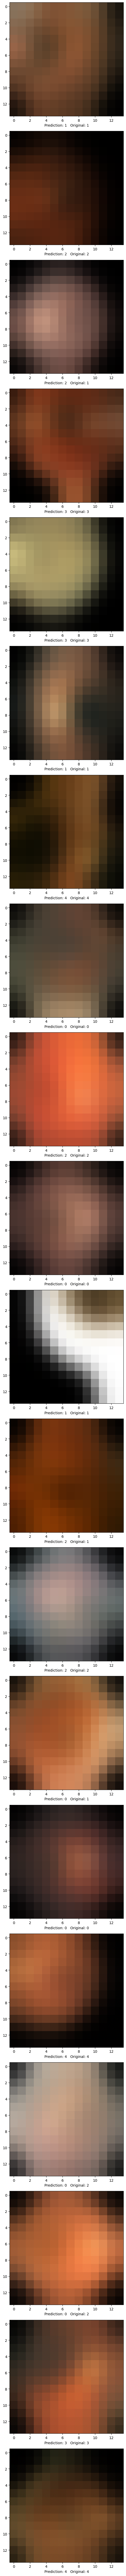

In [41]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [42]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      5201
           1       0.77      0.69      0.73      5238
           2       0.62      0.60      0.61      5113
           3       0.81      0.76      0.79      4917
           4       0.85      0.85      0.85      5149

    accuracy                           0.77     25618
   macro avg       0.77      0.77      0.76     25618
weighted avg       0.77      0.77      0.76     25618



In [43]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion_matrix')

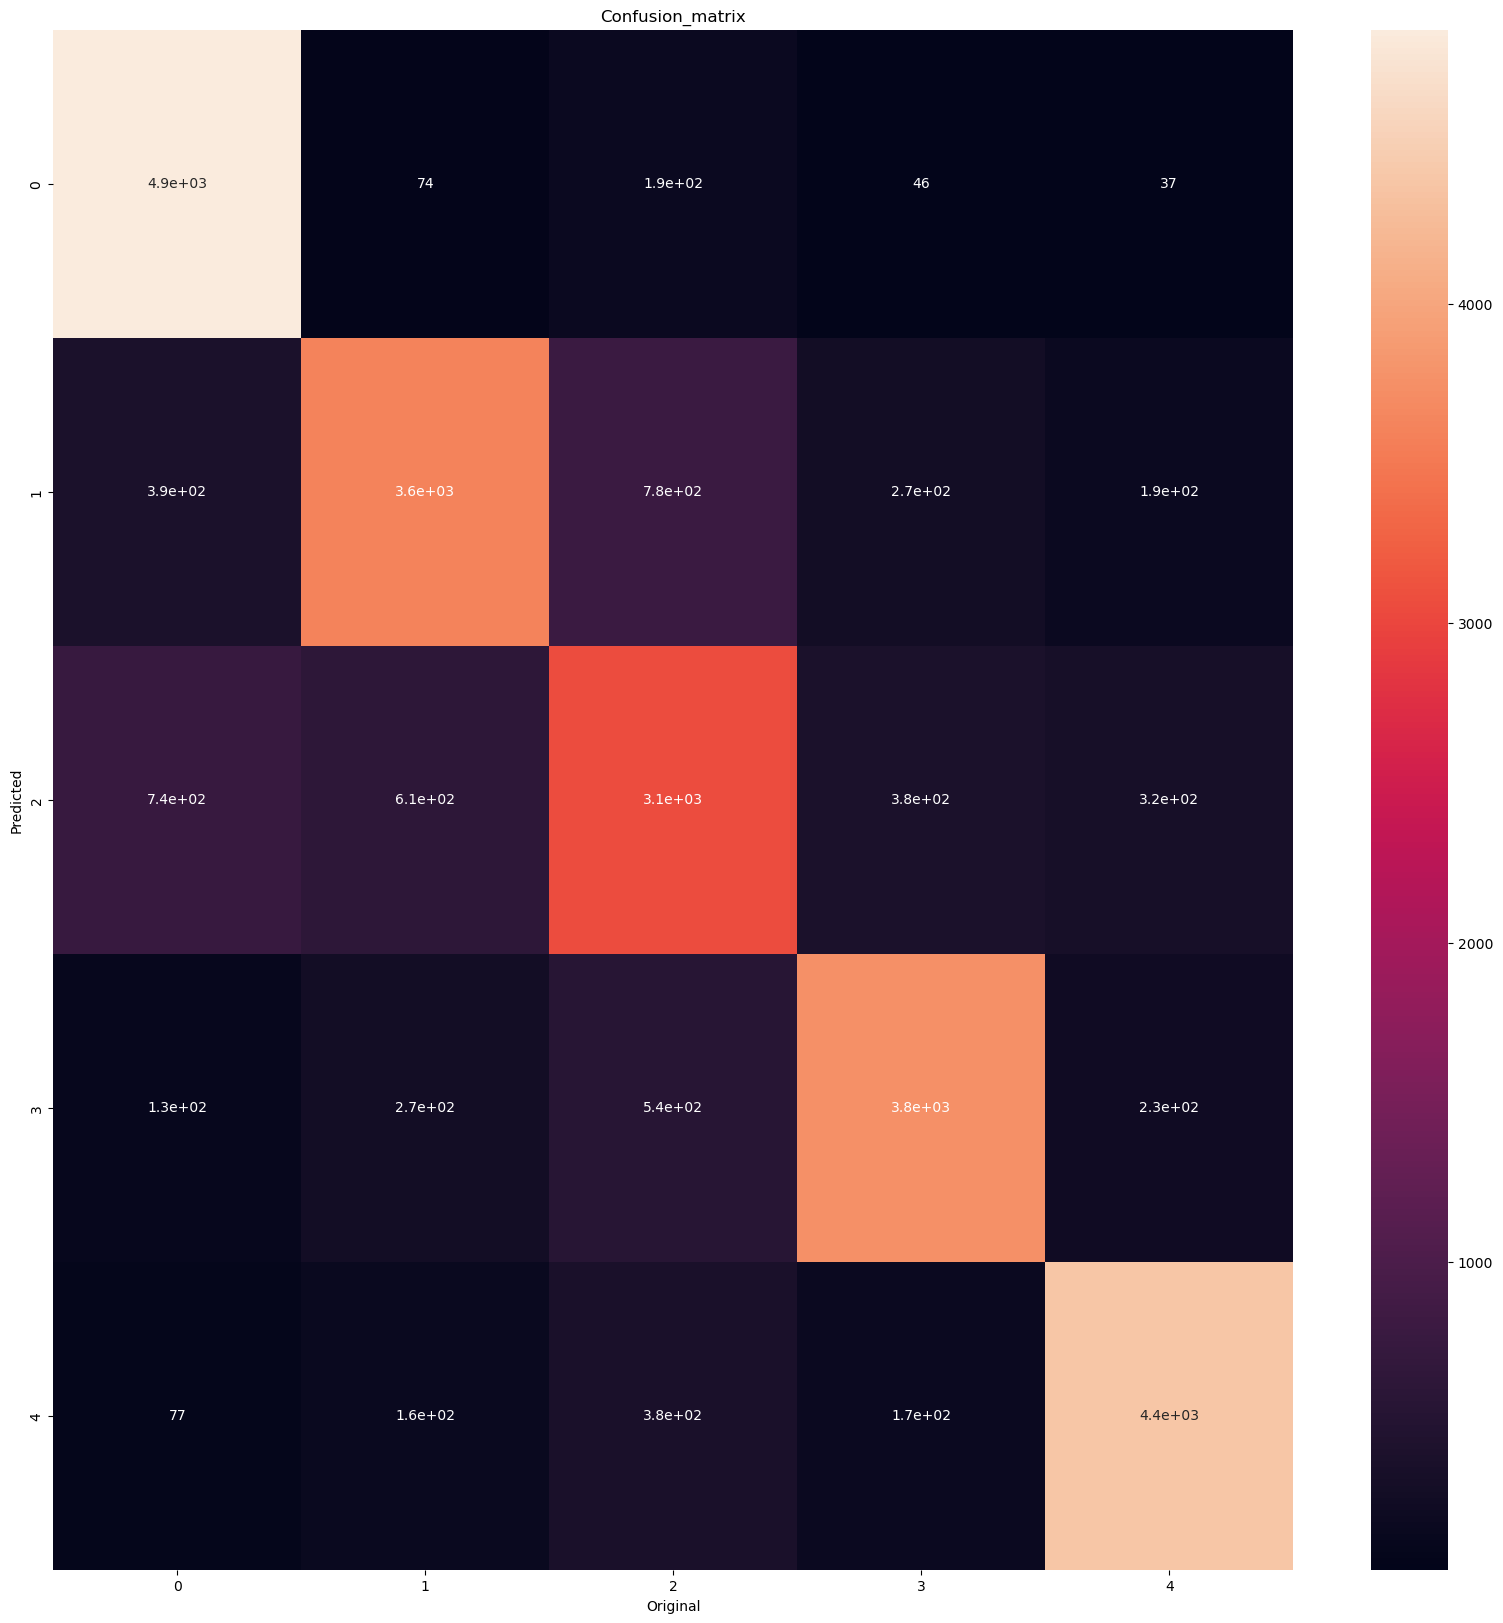

In [44]:
# plot the confusion matrix
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
ax.set_title('Confusion_matrix')


In [45]:
print(confusion_matrix(np.asarray(original), np.asarray(prediction)))

[[4857   74  187   46   37]
 [ 393 3607  783  268  187]
 [ 737  607 3065  381  323]
 [ 130  266  536 3754  231]
 [  77  155  375  171 4371]]
